32430 25
20233 12
19251 11
19836 10
21058 10
23759 13
23946 13
22993 13
28816 15
29665 13


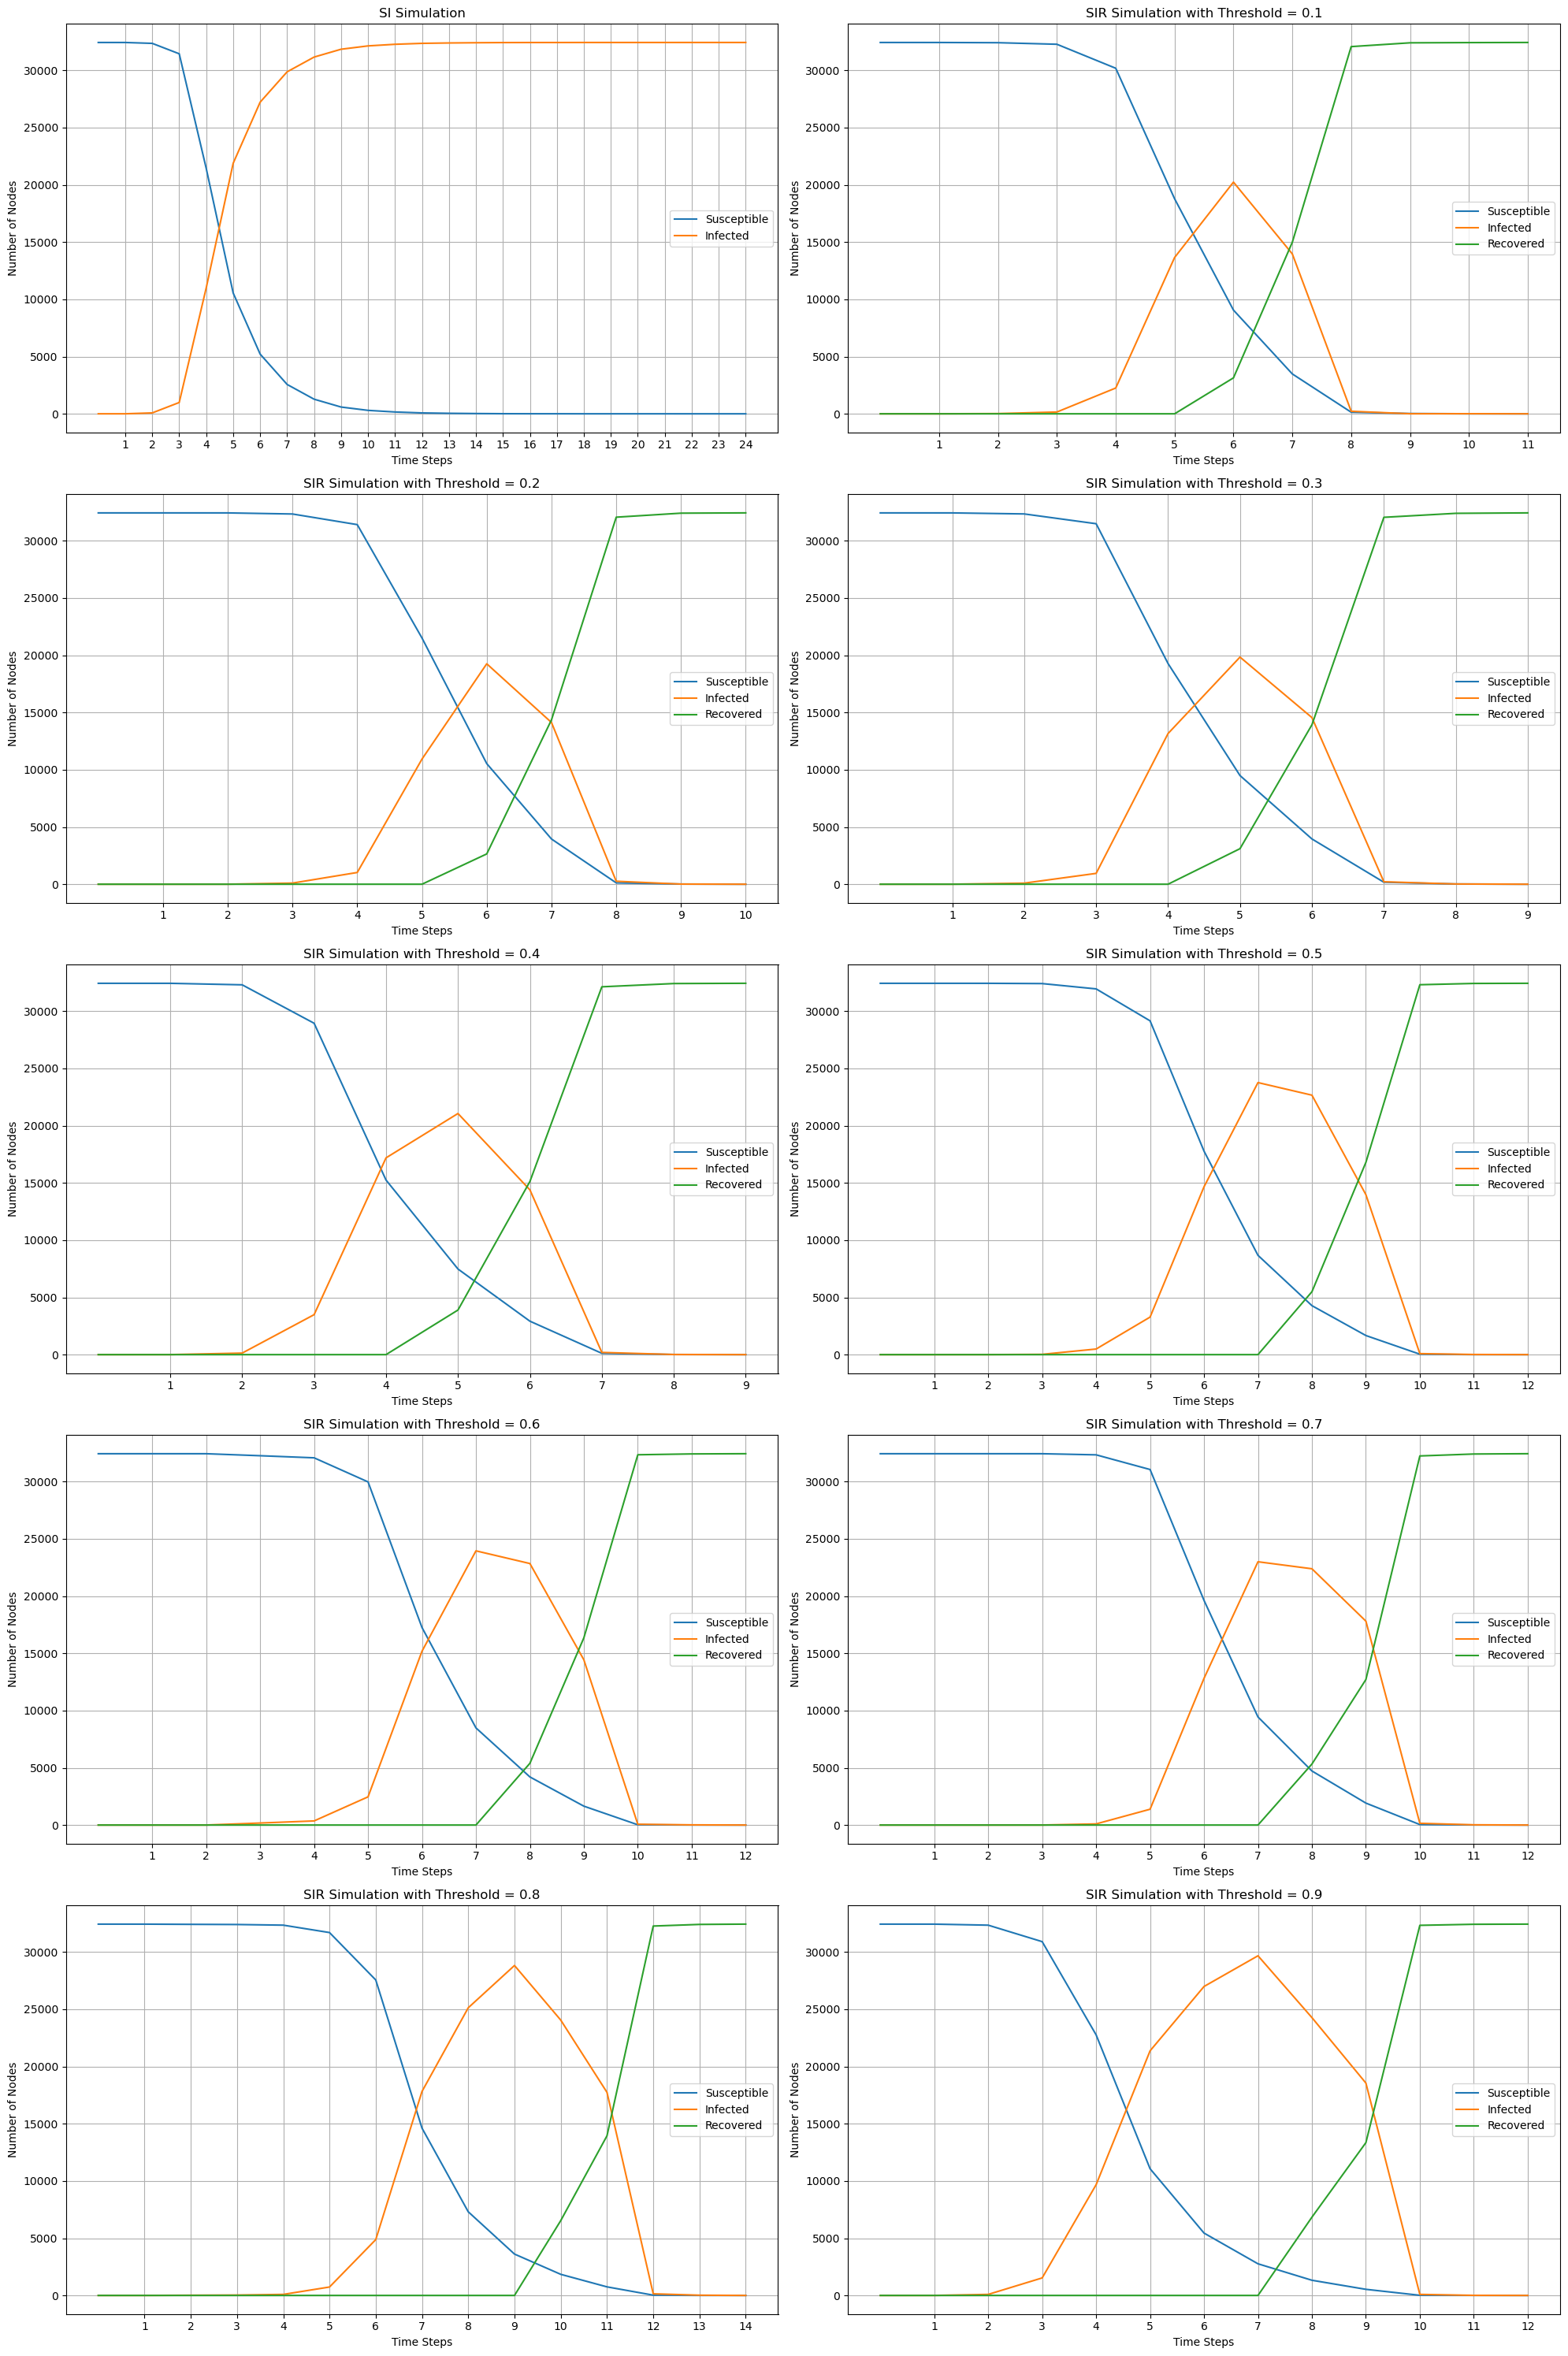

In [48]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the CSV file and create the graph
file_path = 'data\data - fixed numbers.csv'  # Update with the actual path to your file
edge_df = pd.read_csv(file_path, delimiter=' ')
G = nx.from_pandas_edgelist(edge_df, 'Source', 'Target')

# SIR parameters
beta = 0.5      # Transmission probability
gamma = 0.23    # Recovery probability
initial_infected = 1
time_steps = 25  # Adjust based on required duration

# Initialize plot
plt.figure(figsize=(20, 30))

# Loop through thresholds from 0.1 to 0.9
for i, recovery_threshold in enumerate(np.arange(0.0, 1.0, 0.1), start=1):
    # Initialize states
    if recovery_threshold == 0.0:
        gamma = 0
    else:
        gamma = 0.23
    nodes = list(G.nodes)
    n = len(nodes)
    infected_nodes = np.random.choice(nodes, replace=False)
    node_states = {node: 'S' for node in nodes}  # All nodes start as Susceptible (S)
    node_states[infected_nodes] = 'I'
#     node_states[102] = 'R'  # Make sure a node starts as recovered
    
    # Record initial state counts
    susceptible_counts = [n - initial_infected]
    infected_counts = [initial_infected]
    recovered_counts = [0]

    # Simulation loop
    for t in range(1, time_steps):
        new_states = node_states.copy()
        for node in nodes:
            if node_states[node] == 'I':  # Infected node
                # Spread to neighbors
                for neighbor in G.neighbors(node):
                    if node_states[neighbor] == 'S' and np.random.rand() < beta:
                        new_states[neighbor] = 'I'
                # Recover
                if np.random.rand() < gamma and infected_counts[-1] / n > recovery_threshold:
                    new_states[node] = 'R'
                    
            if node_states[node] == 'R':  # Recovered node spreads immunity
                for neighbor in G.neighbors(node):
                    if node_states[neighbor] == 'S' or node_states[neighbor] == 'I':
                        new_states[neighbor] = 'R'
        
        # Update states
        node_states = new_states
        susceptible_counts.append(sum(1 for state in node_states.values() if state == 'S'))
        infected_counts.append(sum(1 for state in node_states.values() if state == 'I'))
        recovered_counts.append(sum(1 for state in node_states.values() if state == 'R'))
        
        # Break if no more infected
        if infected_counts[-1] == 0:
            break
    print(max(infected_counts), len(infected_counts))
    # Plot results for the current threshold
    plt.subplot(5, 2, i)
    if recovery_threshold == 0.0:
        plt.title("SI Simulation")
        plt.plot(susceptible_counts, label="Susceptible")
        plt.plot(infected_counts, label="Infected")
        plt.xlabel("Time Steps")
        plt.ylabel("Number of Nodes")
        plt.xticks(ticks = range(1, len(susceptible_counts)))
        plt.legend()
        plt.grid()
    else:
        plt.title(f"SIR Simulation with Threshold = {recovery_threshold:.1f}")
        plt.plot(susceptible_counts, label="Susceptible")
        plt.plot(infected_counts, label="Infected")
        plt.plot(recovered_counts, label="Recovered")
        plt.xlabel("Time Steps")
        plt.ylabel("Number of Nodes")
        plt.xticks(ticks = range(1, len(susceptible_counts)))
        plt.legend()
        plt.grid()

# Adjust layout and display all plots
plt.tight_layout()
plt.show()


1,0.1:  32426 100
1,0.2:  32430 51
1,0.5:  32430 20
2,0.1:  32430 96
2,0.2:  32430 53
2,0.5:  32430 24
3,0.1:  32410 100
3,0.2:  32430 58
3,0.5:  32430 23
{'1,0.1': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 15, 81, 301, 1172, 3486, 6670, 9575, 12186, 14460, 16412, 18080, 19597, 20959, 22198, 23230, 24180, 24992, 25803, 26518, 27083, 27652, 28146, 28593, 28949, 29317, 29628, 29912, 30146, 30377, 30570, 30740, 30911, 31044, 31182, 31311, 31413, 31513, 31591, 31685, 31777, 31836, 31899, 31950, 31997, 32041, 32071, 32103, 32142, 32178, 32207, 32229, 32249, 32272, 32287, 32300, 32320, 32326, 32334, 32338, 32347, 32357, 32367, 32375, 32380, 32387, 32394, 32394, 32397, 32398, 32399, 32402, 32404, 32405, 32408, 32409, 32413, 32415, 32416, 32417, 32418, 32420, 32422, 32423, 32425, 32425, 32425, 32426], '1,0.2': [1, 3, 88, 1448, 6017, 11799, 16298, 19674, 22450, 24545, 26137, 27418, 28425, 29199, 29838, 30372, 30737, 31062, 31331, 31557, 31725, 31870, 31997, 32074, 32146, 32206, 32244, 32282, 3231

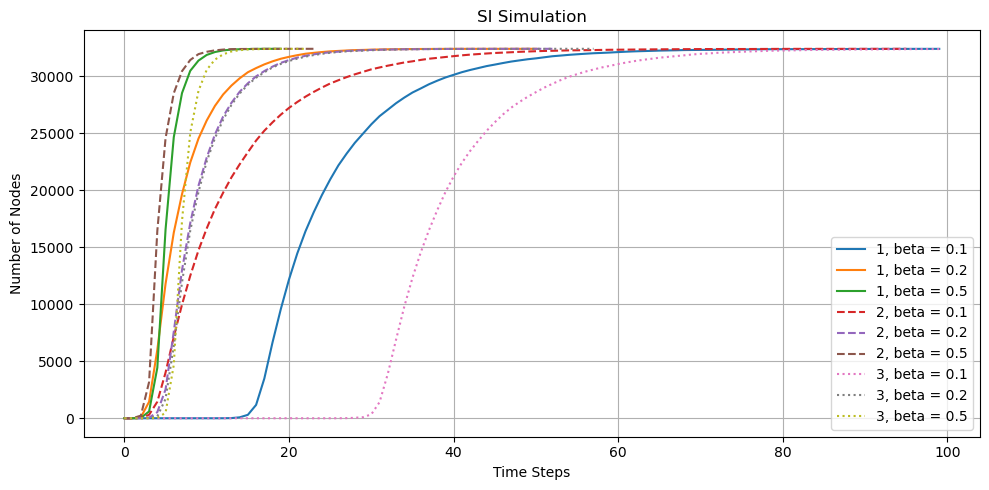

In [65]:
gamma = 0.23    # Recovery probability
initial_infected = 1
sim_history = {}
plt.figure(figsize=(10, 5))
time_steps = 100  # Adjust based on required duration
degrees = dict(G.degree())
# Loop through thresholds from 0.1 to 0.9
for case in [1, 2, 3]:
    for beta in [0.1, 0.2, 0.5]:
        # Initialize states
        nodes = list(G.nodes)
        n = len(nodes)
        if case==3:
            infected_nodes = np.random.choice(nodes, replace=False)
        elif case==1:
            
            max_degree = max(degrees.values())

            # Find all nodes with the minimum degree
            max_degree_nodes = [node for node, degree in degrees.items() if degree == max_degree]

            # Choose one randomly
            infected_node = np.random.choice(max_degree_nodes, replace=False)
        else:
            min_degree = min(degrees.values())

        # Find all nodes with the minimum degree
            min_degree_nodes = [node for node, degree in degrees.items() if degree == min_degree]

            # Choose one randomly
            infected_node = np.random.choice(min_degree_nodes, replace=False)

        node_states = {node: 'S' for node in nodes}  # All nodes start as Susceptible (S)
        node_states[infected_nodes] = 'I'
        # node_states[102] = 'R'  # Make sure a node starts as recovered

        # Record initial state counts
        susceptible_counts = [n - 1]  # Assuming 1 initial infected
        infected_counts = [1]  # Assuming 1 initial infected

        # Simulation loop
        for t in range(1, time_steps):
            new_states = node_states.copy()
            for node in nodes:
                if node_states[node] == 'I':  # Infected node
                    # Spread to neighbors
                    for neighbor in G.neighbors(node):
                        if node_states[neighbor] == 'S' and np.random.rand() < beta:
                            new_states[neighbor] = 'I'

            # Update states
            node_states = new_states
            susceptible_counts.append(sum(1 for state in node_states.values() if state == 'S'))
            infected_counts.append(sum(1 for state in node_states.values() if state == 'I'))

            # Break if no more infected
            if susceptible_counts[-1] == 0:
                break

        sim_history.update({f"{case},{beta}": infected_counts})
        print(f"{case},{beta}: ",max(infected_counts), len(infected_counts))
print(sim_history)
plt.title("SI Simulation")
for key in sim_history:
    if key[0]=="1":
        plt.plot(sim_history[key], label=f"{key[0]}, beta = {key[2:]}")
    if key[0]=="2":
        plt.plot(sim_history[key], label=f"{key[0]}, beta = {key[2:]}",  linestyle = 'dashed')
    if key[0]=="3":
        plt.plot(sim_history[key], label=f"{key[0]}, beta = {key[2:]}", linestyle ='dotted')
plt.xlabel("Time Steps")
plt.ylabel("Number of Nodes")
#plt.xticks(ticks = range(1, len(susceptible_counts)))
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()